In [1]:
import numpy as np
import matplotlib.pyplot as plt
import GPy
import scipy.linalg as sp_linalg

# warped

In [17]:
X = np.random.randn(200, 1)
Y = np.sin(X) + np.random.randn(200, 1)*0.05

m = GPy.models.WarpedGP(X, Y)


In [18]:
m.warp_tanh.psi

index,gp.warp_tanh.psi,constraints,priors
[0 0],1.00000000,+ve,
[0 1],1.00000000,+ve,
[0 2],1.00000000,,
[1 0],1.00000000,+ve,
[1 1],1.00000000,+ve,
[1 2],1.00000000,,
[2 0],1.00000000,+ve,
[2 1],1.00000000,+ve,
[2 2],1.00000000,,


In [19]:
m.optimize()

m

gp.,value,constraints,priors
rbf.variance,2.4047631459601546,+ve,
rbf.lengthscale,2.3163682267638417,+ve,
Gaussian_noise.variance,0.002860992520333858,+ve,
warp_tanh.psi,"(3, 3)",{+ve},
warp_tanh.d,1.0340319032691752,+ve,


{'dataplot': [<matplotlib.collections.PathCollection at 0x7fa6442f3400>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7fa64420a8e0>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7fa64420aaf0>]}

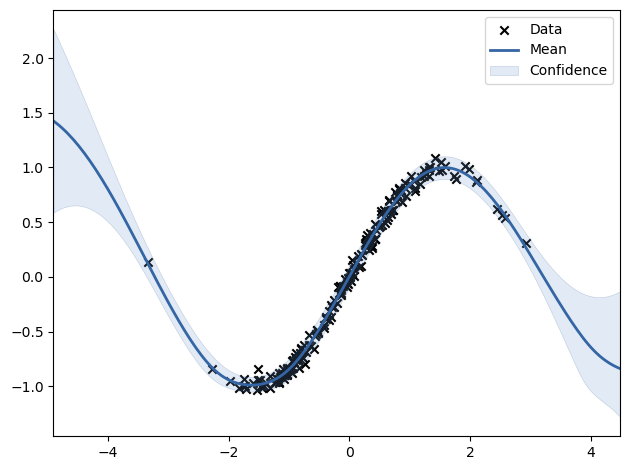

In [20]:
m.plot()

# draft

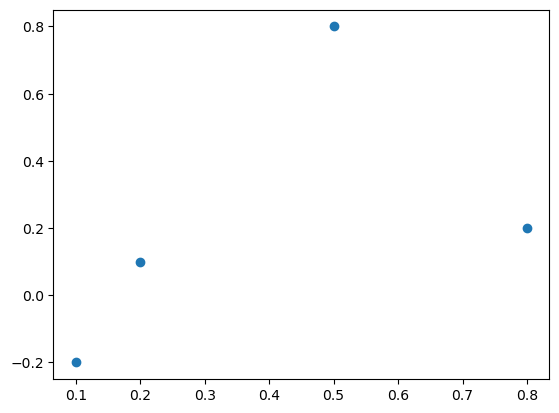

In [6]:
X_init = np.array([0.1,0.2,0.5,0.8])
Y_init = np.array([-0.2,0.1,0.8,0.2])

plt.scatter(X_init,Y_init)

In [7]:
lengthscale_gp = 0.2
variance_gp = 1**2

kernel = GPy.kern.RBF(input_dim=1,lengthscale= lengthscale_gp,variance=variance_gp)  #np.sqrt(res[0])
m = GPy.models.GPRegression(X_init.reshape(-1,1), Y_init.reshape(-1,1),kernel)
m.Gaussian_noise.variance.fix(10**(-5))

array([0])

In [8]:
m.optimize()

In [5]:
m

GP_regression.,value,constraints,priors
rbf.variance,0.25788940516732417,+ve,
rbf.lengthscale,0.26916835763284064,+ve,
Gaussian_noise.variance,1e-05,+ve fixed,


In [6]:
X = np.random.randn(200, 1)
Y = np.sin(X) + np.random.randn(200, 1)

kernel = GPy.kern.RBF(input_dim=1,lengthscale= lengthscale_gp,variance=variance_gp)  #np.sqrt(res[0])
m = GPy.models.GPRegression(X.reshape(-1,1), Y.reshape(-1,1),kernel)
m.Gaussian_noise.variance.fix(10**(-5))

m.optimize_restarts(10)

Optimization restart 1/10, f = 335.40603410289475
Optimization restart 2/10, f = 335.40608848569894
Optimization restart 3/10, f = 335.40603365622627
Optimization restart 4/10, f = 335.4060336562262
Optimization restart 5/10, f = 335.4060336562262
Optimization restart 6/10, f = 335.4060336562262
Optimization restart 7/10, f = 335.40603428276745
Optimization restart 8/10, f = 335.40603365622735
Optimization restart 9/10, f = 335.40603365622786
Optimization restart 10/10, f = 335.40603365622684


In [155]:
from botorch.test_functions import Ackley,Levy,Beale,Branin,Hartmann,Rosenbrock,Powell,SixHumpCamel
from known_boundary.utlis import Trans_function, get_initial_points,transform
import torch
from botorch.utils.transforms import unnormalize,normalize
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dtype = torch.double


fun = Ackley(dim=5)
dim = fun.dim
bounds = fun.bounds
standard_bounds=np.array([0.,1.]*dim).reshape(-1,2)

X_BO = get_initial_points(bounds, 50,device,dtype,seed=0)
Y_BO = fun(X_BO)

Y_BO = (Y_BO-torch.mean(Y_BO))/torch.std(Y_BO)
X_BO = normalize(X_BO, bounds)
                

In [156]:
kernel = GPy.kern.RBF(input_dim=5)  #np.sqrt(res[0])
m = GPy.models.GPRegression(X_BO.numpy(), Y_BO.numpy().reshape(-1,1),kernel)
m.Gaussian_noise.variance.fix(10**(-5))

m.optimize_restarts(10)

Optimization restart 1/10, f = 67.25414673609251
Optimization restart 2/10, f = 67.25414673617747
Optimization restart 3/10, f = 67.25414673615121
Optimization restart 4/10, f = 67.25414673729522
Optimization restart 5/10, f = 67.25414673614802
Optimization restart 6/10, f = 67.25414673609208
Optimization restart 7/10, f = 67.25414673609201
Optimization restart 8/10, f = 67.25414673624424
Optimization restart 9/10, f = 67.254146736092
Optimization restart 10/10, f = 67.25414673679447


In [157]:
m

GP_regression.,value,constraints,priors
rbf.variance,0.9322379880279829,+ve,
rbf.lengthscale,0.2352587215216329,+ve,
Gaussian_noise.variance,1e-05,+ve fixed,


In [158]:
from known_boundary.GP import optimise

res = optimise(X_BO.numpy(), Y_BO.numpy().reshape(-1,1))
print('lengthscale is: ',np.sqrt(res[0])) 
print('variance is: ',res[1])


lengthscale is:  0.23525858239218897
variance is:  0.9322465076058449


In [127]:
X = np.array([0,1]).reshape(-1,1)
Y = np.array([0.2,0.3]).reshape(-1,1)
kernel = GPy.kern.RBF(input_dim=1,lengthscale=2,variance=3**2) 
m = GPy.models.GPRegression(X, Y,kernel)
m.Gaussian_noise.variance.fix(10**(-5))

m

GP_regression.,value,constraints,priors
rbf.variance,9.0,+ve,
rbf.lengthscale,2.0,+ve,
Gaussian_noise.variance,1e-05,+ve fixed,


In [15]:
m.optimize()

In [70]:
kernel.dK_dvariance(X,X)

array([[1.       , 0.8824969],
       [0.8824969, 1.       ]])

In [72]:
kernel._clean_K(X,X)

array([[9.        , 7.94247212],
       [7.94247212, 9.        ]])

In [45]:
9*np.exp(-0.5*1/4)

7.942472123261359

# Example

In [93]:
import numpy as np
from scipy.optimize import fmin_l_bfgs_b

# Define the objective function and its gradient
def objective_function(x):
    # Example objective function: f(x) = (x[0] - 2)**2 + (x[1] - 3)**2
    return (x[0] - 2)**2 + (x[1] - 3)**2

def gradient(x):
    # Gradient of the objective function
    dfdx0 = 2 * (x[0] - 2)
    dfdx1 = 2 * (x[1] - 3)
    return np.array([dfdx0, dfdx1])

# Define bounds for each parameter
# In this example, we constrain x[0] to be between 1.0 and 3.0,
# and x[1] to be between 2.0 and 4.0
bounds = [(1.0, 3.0), (2.0, 4.0)]

# Initial guess for the optimization
initial_guess = np.array([0.0, 0.0])

# Call fmin_l_bfgs_b with bounds to perform the optimization
result = fmin_l_bfgs_b(objective_function, initial_guess, fprime=gradient, bounds=bounds)

# Extract the optimized parameters and the minimum value
optimized_params = result[0]
min_value = result[1]

# Print the results
print("Optimized Parameters:", optimized_params)
print("Minimum Value:", min_value)


Optimized Parameters: [2. 3.]
Minimum Value: 0.0


In [94]:
gradient(initial_guess).shape


(2,)

# Try

In [158]:
np.random.seed(0)
X = np.random.randn(20, 1)
Y = np.sin(X) 

kernel = GPy.kern.RBF(input_dim=1,lengthscale= 1,variance=1**2)  
m = GPy.models.GPRegression(X.reshape(-1,1), Y.reshape(-1,1),kernel)
m.Gaussian_noise.variance.fix(10**(-6))



array([0])

In [174]:
def GPy_dK_dlengthscale(kernel, X, X2):
    """
    Compute the derivative(s) of K with respect to lengthscale(s).
    """
    lengthscaleinv = (np.ones(X.shape[1])/(kernel.lengthscale))
    dist = np.rollaxis(X[:,None,:] - X2[None,:,:], 2, 0)

    K = kernel._clean_K(X, X2)

 
    g = np.dot(K,(lengthscaleinv[0]**3)*np.sum(dist**2, axis=0))
    return g

In [170]:
GPy_dK_dlengthscale(kernel, X, X)

array([[ 9.13734359, 10.06479077,  5.19739128, 17.45580397, 10.56249921,
        48.18214484,  5.28327455, 20.84150217, 19.6622691 ,  9.91854082,
        14.32435292,  6.13266444,  6.25524415, 14.75771295,  9.46692137,
        11.04636524,  6.41294028, 22.21345596, 11.3682789 , 43.2520511 ],
       [32.36446961,  6.44352118, 10.61359907, 54.6130045 , 36.61333877,
        36.99160998, 10.17042001, 11.83172328, 10.99739047,  6.42965878,
         7.80913627, 21.5714884 ,  7.86428839,  8.02198794,  6.40733609,
         6.60861624, 22.79690895, 12.84659391,  6.68674842, 31.93868158],
       [22.42374449,  8.31784815,  7.8974995 , 39.72698085, 25.63502123,
        47.29408483,  7.69624563, 17.50333433, 16.360047  ,  8.22665023,
        11.5170657 , 14.61733044,  6.94831867, 11.88428042,  7.95659647,
         8.9706159 , 15.46895977, 18.85841332,  9.19823868, 41.63081878],
       [ 4.26172497,  9.19742887,  4.00194991,  8.52790592,  4.92397759,
        39.9586275 ,  4.15166245, 18.40450468, 1

In [166]:
dK_dlengthscale(X, X, np.array([1,1]))

array([[ 4.5686718 ,  5.03239538,  2.59869564,  8.72790199,  5.2812496 ,
        24.09107242,  2.64163727, 10.42075109,  9.83113455,  4.95927041,
         7.16217646,  3.06633222,  3.12762207,  7.37885648,  4.73346069,
         5.52318262,  3.20647014, 11.10672798,  5.68413945, 21.62602555],
       [16.18223481,  3.22176059,  5.30679954, 27.30650225, 18.30666939,
        18.49580499,  5.08521001,  5.91586164,  5.49869524,  3.21482939,
         3.90456814, 10.7857442 ,  3.93214419,  4.01099397,  3.20366804,
         3.30430812, 11.39845447,  6.42329695,  3.34337421, 15.96934079],
       [11.21187224,  4.15892407,  3.94874975, 19.86349042, 12.81751061,
        23.64704241,  3.84812282,  8.75166716,  8.1800235 ,  4.11332512,
         5.75853285,  7.30866522,  3.47415934,  5.94214021,  3.97829823,
         4.48530795,  7.73447988,  9.42920666,  4.59911934, 20.81540939],
       [ 2.13086248,  4.59871443,  2.00097496,  4.26395296,  2.4619888 ,
        19.97931375,  2.07583123,  9.20225234,  

In [160]:
m

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1e-06,+ve fixed,


In [107]:
m.optimize()
m

GP_regression.,value,constraints,priors
rbf.variance,2.4040930561010505,+ve,
rbf.lengthscale,2.378001819186986,+ve,
Gaussian_noise.variance,1e-06,+ve fixed,


In [175]:
print(m.rbf.lengthscale.gradient)
print(m.rbf.variance.gradient)

[25.30962642]
[-3.35854054]


In [176]:
print(parameter_gradient(X,Y,np.array([1**2,1])))
print(negative_log_llk(X,Y,np.array([1**2,1])))

[12.66444837 -3.35974196]
-72.85873598582145


I need a function where the inputs is parameter and X,y, returning loglikelihood and its gradient

In [185]:
import numpy as np
import scipy
from sklearn.metrics.pairwise import euclidean_distances
from scipy.optimize import minimize
from scipy.optimize import fmin_l_bfgs_b


def array(*args, **kwargs):
    kwargs.setdefault("dtype", np.float32)
    return np.array(*args, **kwargs)

def cov_RBF(x1, x2, parameters):  
    
    lengthscale_square =   parameters[:,0]  # lengthscale^2
    variance = parameters[:,1] # sigma^2


    if x1.shape[1]!=x2.shape[1]:
        x1=np.reshape(x1,(-1,x2.shape[1]))

    Euc_dist=euclidean_distances(x1,x2) 

    return variance*np.exp(-0.5*np.square(Euc_dist)/lengthscale_square)


#################### Normal GP ############################

def negative_log_llk(X,y,parameters):

    noise_delta = 10**(-6)
    
    parameters = parameters.reshape(-1,2)
    
    if np.isnan(parameters).any():
        #print('issue with scipy.minimize!')
        
        return -np.inf
 
    KK_x_x=cov_RBF(X,X,parameters)+np.eye(len(X))*noise_delta     
    if np.isnan(KK_x_x).any(): #NaN
        print("nan in KK_x_x !")   
        print('X is: ',X)
        print('parameter is: ',parameters)
        print(np.isnan(parameters).any())

    
    try:
        first_term = -0.5*np.log(np.linalg.det(KK_x_x))
        
        KK_inv = np.linalg.inv(KK_x_x)
        second_term = -0.5* np.dot(np.dot(y.T,KK_inv),y)
            

    except: # singular
        return -np.inf

    logmarginal = first_term+second_term -0.5*len(y)*np.log(2*3.1415926)
    
    return -logmarginal.item()

In [186]:
def dK_dvariance(x1, x2, parameters):
    """
    Compute the derivative of K with respect to variance.
    
    """
    parameters = parameters.reshape(-1,2)
    variance = parameters[:,1] # sigma^2
    return cov_RBF(x1, x2, parameters)/variance


def dK_dlengthscale(x1, x2, parameters):
    """
    Compute the derivative(s) of K with respect to lengthscale(s).
    """
    parameters = parameters.reshape(-1,2)
    lengthscale_square =   parameters[:,0] 

    Euc_dist =euclidean_distances(x1,x2) 
    #g=np.dot(cov_RBF(x1, x2, parameters),0.5*Euc_dist**2/(np.sqrt(lengthscale_square)**2))
    g = cov_RBF(x1, x2, parameters)*0.5*Euc_dist**2/(np.sqrt(lengthscale_square)**2)
    
    return g



def parameter_gradient(X,Y,parameters):
    
    res = np.array([0.,0.])
    
    parameters = parameters.reshape(-1,2)
    noise_delta = 10**(-6)
    KK_x_x=cov_RBF(X,X,parameters)+np.eye(len(X))*noise_delta  

    KK_inv = np.linalg.inv(KK_x_x)
    alpha = np.dot(KK_inv,Y).reshape(-1,1) 

    res[0] = 0.5* np.trace(np.dot((np.dot(alpha,alpha.T)-KK_inv),dK_dlengthscale(X, X, parameters)))
    res[1] = 0.5* np.trace(np.dot((np.dot(alpha,alpha.T)-KK_inv),dK_dvariance(X, X, parameters)))  #gradient towards variance
    
    return res
    

In [150]:
bounds = [(0.01**2, 3.**2), (0.01**2, 4**2)]

# Initial guess for the optimization
initial_guess = np.array([2.5**2,0.064 ])

# Call fmin_l_bfgs_b with bounds to perform the optimization
objective_function = lambda x : negative_log_llk(X,Y,x)
gradient = lambda x : parameter_gradient(X,Y,x)

result = fmin_l_bfgs_b(objective_function, initial_guess, fprime=gradient, bounds=bounds)

# Extract the optimized parameters and the minimum value
optimized_params = result[0]
min_value = result[1]

print(np.sqrt(optimized_params))
print(min_value)

[2.50000286 0.2549887 ]
-0.8510023783463037


In [187]:
bounds = [(0.01**2, 3.**2), (0.01**2, 4**2)]

# Initial guess for the optimization
initial_guess = np.array([2.**2,2.**2 ])

# Call fmin_l_bfgs_b with bounds to perform the optimization
objective_function = lambda x : negative_log_llk(X,Y,x)
gradient = lambda x : parameter_gradient(X,Y,x)

result = fmin_l_bfgs_b(objective_function, initial_guess, fprime=gradient, bounds=bounds)

# Extract the optimized parameters and the minimum value
optimized_params = result[0]
min_value = result[1]

print(optimized_params)
print(min_value)

[4. 4.]
-82.4787554137622


In [188]:
parameter_gradient(X,Y,initial_guess)

array([ 6.77383432, -0.60333288])